In [58]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Integration

## Trapezoidal Method

In [59]:
def f(x):
    return x**3

In [60]:
def trapezoidal(a, b, n):
    """
    The basic idea is that integration can be replaced by a summation. This is the idea of Riemann integration. The crudest approximation for a function can be to assume it to be a trapezoid. If this is done at small enough steps from the lower limit to the upper limit of integration then we obtain a nice approximation of the integral using trapezoids. 
    
    a: lower limit
    b: upper limit
    n: number of steps
    """
    h = (b - a)/n # step size
    sum = 0
    for i in range(1, n-1):
        sum += h*f(a + i*h) # approximate the function as a trapezium at each iteration
    return h * f(a)/2 + sum + h * f(b)/2 # the boundary terms are calculated separately

In [61]:
lower = 0
upper = 1
n = 1000

print(f"The integral of x^3 between 0 and 1 is {trapezoidal(lower, upper, n)}")

The integral of x^3 between 0 and 1 is 0.24900324700099982


## Simpson 1/3 Method

In [62]:
def simpson_one_third(a, b, n):
    """
    Here instead of assuming the function to be a straight line in a very small interval giving us a trapezium we assume it to be quadratic. This leads to the function being approximated by an odd and even series which can be summed separately. as below.
    """
    
    h = (b - a)/n # step size

    bdry_sum = f(a) + f(b) # boundary terms calculated separately
    even_sum = 0
    odd_sum = 0
    for i in range(1, n-1, 2):
        odd_sum += 4 * f(a + i * h) # sum of the odd part of the series of the function being integrated
        even_sum += 2 * f(a + (i+1)* h) # sum of the even part of the series of the function being integrated
    
    return h/3 * (bdry_sum + odd_sum + even_sum)

In [63]:
lower_simpson = 0
upper_simpson = 1
n_simpson = 1000

print(f"The integral of x^3 between 0 and 1 is calculated using Simpson's 1/3rd rule is {simpson_one_third(lower_simpson, upper_simpson, n_simpson)}")

The integral of x^3 between 0 and 1 is calculated using Simpson's 1/3rd rule is 0.24867066266799998


## Adaptive Integration

In [64]:
tol = 1e-16

def f_adaptive_int(x):
    return np.sin(x)

In [65]:
def I(a, b):
    """
    The basic idea here is again to approximate the entire function as a trapezium and calculating the area and also calculating the sum of the areas of the trapezoids formed by dividing the domain in half. If these two values are close enough then the integral is done otherwise the domain continues to be split in half till a certain tolerance epsilon which we choose is attained
    """

    global counter1 # this makes the counter variable accessible from anywhere and not just part of the function
    counter1 += 1 # counting the number of steps this program runs for

    # values at the boundaries
    f1 = f_adaptive_int(a)
    f2 = f_adaptive_int(b)

    m = (a + b)/2 # midpoint of the domain
    fm = f_adaptive_int(m) # value at the midpoint

    # calculating the area of the trapezoids
    I0 = (b - a) * (f1 + f2)/2
    I1 = (m - a) * (f1 + fm)/2
    I2 = (b - m) * (fm + f2)/2

    if abs(I1 + I2 - I0) < tol:
        return (I1 + I2)
    return I(a, m) + I(m, b) # this step keeps subdividing the domain

In [66]:
counter1 = 0
llim = 0
ulim = 2.1 * np.pi
result = I(llim, ulim)
print(f"Result from adaptive integration: {result}")
print(f"Known analytical result: {-np.cos(ulim) + 1}")
print(f"Number of steps: {counter1}")

Result from adaptive integration: 0.04894348370463164
Known analytical result: 0.04894348370484636
Number of steps: 1411877


There is another implementation of adaptive integration where the number of function calls is minimized compared to the implementation above

In [67]:
def I_optimized(a, b, f1, f2):
    """
    Same basic idea as above but more optimized to reduce the number of function calls
    """
    global counter2
    counter2+=1
    m = (a + b)/2
    fm = f_adaptive_int(m)
    I0 = (b - a) * (f1 + f2)/2
    I1 = (m - a) * (f1 + fm)/2
    I2 = (b - m) * (fm + f2)/2

    if abs(I1 + I2 - I0) < tol:
        return (I1 + I2)
    return I_optimized(a, m, f1, fm) + I_optimized(m, b, fm, f2)

In [68]:
counter2 = 0
llim = 0
ulim = 2.1 * np.pi
result = I_optimized(llim, ulim, f_adaptive_int(llim), f_adaptive_int(ulim))
print(f"Result from adaptive integration: {result}")
print(f"Known analytical result: {-np.cos(ulim) + 1}")
print(f"Number of steps (optimized): {counter2}")

Result from adaptive integration: 0.04894348370463164
Known analytical result: 0.04894348370484636
Number of steps (optimized): 1411877


# 2. Lagrange Interpolation

The general formula for find the value of a function at any point in the domain given that the values at certain points, $x_i$'s are known is:

$$f(x) = \frac{(x - x_1)(x - x_2)\dots(x-x_n)}{(x_0 - x_1)(x_0 - x_2)\dots(x_0-x_n)}f(x_0) + \frac{(x - x_0)(x - x_2)\dots(x-x_n)}{(x_0 - x_1)(x_1 - x_2)\dots(x_1-x_n)}f(x_1) + \dots$$

This can be generalized to:

$$f(x) = \sum_{i = 0}^n \frac{\prod_{j\neq i}^n (x - x_j)}{\prod_{j\neq i}^n(x_i - x_j)}f(x_i)$$

This general formula can be written down and is done below.

In [69]:
def lagrange_interp(x, fx, x_interp):
    """
    x, fx: sample dataset in a given range
    x_interp: point at which the interpolated value has to be found
    """

    fx_interp = 0

    for i in range(len(x)):
        prod1, prod2 = 1, 1 # these two calculate the products as in the formula above at each iteration
        for j in range(len(x)):
            if i == j:
                continue # skip the same index to prevent singularities
            else:
                prod1 *= (x_interp - x[j])
                prod2 *= (x[i] - x[j])
        fx_interp += (prod1/prod2) * fx[i]

    return fx_interp

In [70]:
x0, xn = -5, 5
x = np.linspace(-5, 5, 100)
fx = np.zeros(len(x))
for i in range(len(x)):
    fx[i] = np.sin(x[i]) + (-0.1 + 0.2*np.random.random())  

x_interp = x[50] + (-0.5 + np.random.random()) # choosing a point around x = 0
print(f"The value of the function at {x_interp} is {lagrange_interp(x[45:55], fx[45:55], x_interp)}") # the interpolation becomes very unstable for too many interpolating points. Thus for better results only 10 points close to the interpolation point have been chosen

The value of the function at -0.1951198342168855 is -0.2316898793255189


# 3. Random Numbers

## Making a Histogram

The first step is to choose a set of random numbers that are uniformly distributed in the range 0 to 1. To check that the numbers obtained are from a uniform distribution a histogram can be plotted. To make a histogram we can choose a bin size $dx$ and then assign integer numbers to each bin from the lower end to the upper end of the domain. The bin for each number is then calculated and then the frequency is updated.

In [71]:
def histogram(N, dx):
    # N is the number of numbers in the set and dx is the step size
    num_arr = np.zeros(N)

    for i in range(N):
        num_arr[i] = np.random.random() # generating the set of random numbers

    x = np.arange(0, 1, dx)

    freq_arr = np.zeros(len(x))

    for i in range(N):
        n = int(num_arr[i]/dx) + 1 # checking which bin the number lies in
        freq_arr[n-1]+=1 # updating the frequency of that bin

    return x, freq_arr, num_arr

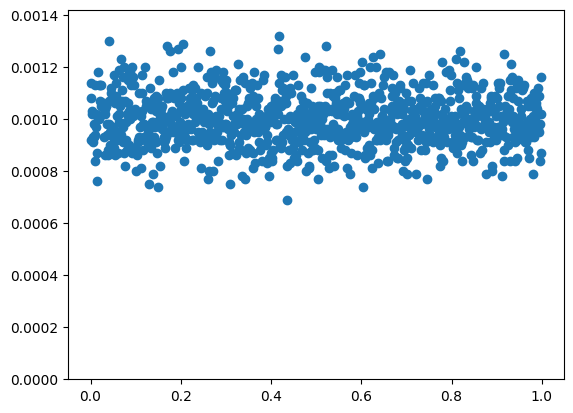

In [72]:
N, dx = 100000, 0.001
x, freq_arr, num_arr = histogram(N, dx)
plt.scatter(x, freq_arr/N)
plt.ylim(0, max(freq_arr/N) + 0.0001)
plt.show()

## Coin Toss

In [73]:
def head_or_tail():
    """
    Flip a coin with equal probability
    """
    r = np.random.random()

    # fully unbiased coin toss
    if r < 0.5: return 'H'
    else: return 'T'

def coin_toss(n):
    """
    Perform the coin toss n times
    """
    trial_str = ""
    for _ in range(n):
        trial_str += head_or_tail()
    H_count = 0
    T_count = 0

    for char in trial_str:
        if char == 'H':
            H_count += 1
        else: 
            T_count += 1

    return H_count, T_count

In [74]:
N = 10 # number of independent coin toss experiments
n = 100000 # number of coin tosses in each coin toss experiment
H_count_arr = np.zeros(N)
T_count_arr = np.zeros(N)

for i in range(N):
    H_count_arr[i], T_count_arr[i] = coin_toss(n)

print(f"The probability of obtaining a heads averaged over {N} trials is {np.mean(H_count_arr)/n}")
print(f"The probability of obtaining a tails averaged over {N} trials is {np.mean(T_count_arr)/n}")

The probability of obtaining a heads averaged over 10 trials is 0.5002869999999999
The probability of obtaining a tails averaged over 10 trials is 0.499713


## Shuffling cards in a deck

In [75]:
def shuffling(a, N):
    new = a # a is the original array
    for index in range(N):
        l = index + int((N - index) * np.random.random()) # selecting the index from left to right at each iteration in such a way that an index that has been compared already does not have to be compared again

        #exchanging values by using a temporary 3rd variable
        temp = new[index]
        new[index] = new[l]
        new[l] = temp

    return new

a = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
print(f"The shuffled list is {shuffling(a, len(a))}")

The shuffled list is ['g', 'c', 'd', 'e', 'h', 'a', 'b', 'f']


# 4. Linear Least Square Fit

In [76]:
def linear_fit(x, y):
    # fitting y = A + Bx

    mean_x = np.mean(x)
    mean_y = np.mean(y)

    mean_xy = np.mean(x*y)
    mean_x_sq = np.mean(x**2)

    det = (1/(mean_x_sq - (mean_x)**2))

    A = ((mean_x_sq * mean_y) - (mean_x * mean_xy)) * det # this are the estimated value of the parameter A
    B = ((-mean_x * mean_y) + (mean_xy)) * det # this are the estimated value of the parameter B

    return A, B

def x_vs_y(a, b, x, eps):
    """
    Generate an almost straight line with small random deviations based on the value of eps
    """

    eta = -0.5 + np.random.random()

    return a + b * x + eps * eta

def many_noisy_data(eps):
    """
    Generate many noisy data sets with different values of eps. The actual value of the parameters a and b are chosen to be 1 and 1.
    """
    x = np.arange(50)
    y = np.zeros(len(x))
    for i in range(len(x)):
        y[i] = x_vs_y(1, 1, x[i], eps)

    return linear_fit(x, y)

In [77]:
eps_array = np.array([1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

a_est, b_est = np.zeros(len(eps_array)), np.zeros(len(eps_array)) # many different estimated values of the parameters

for i in range(len(eps_array)):
    a_est[i], b_est[i] = many_noisy_data(eps_array[i])

To see what the estimated coefficients vary with the value of eps we can plot both of them separately to see the variation

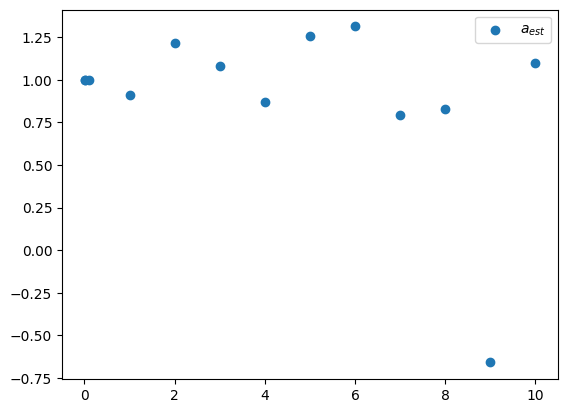

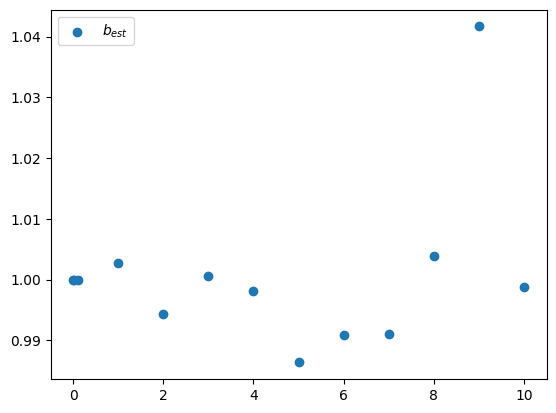

In [78]:
plt.scatter(eps_array, a_est, label = r"$a_{est}$")
plt.legend()
plt.show()
plt.scatter(eps_array, b_est, label = r"$b_{est}$")
plt.legend()
plt.show()

In [82]:
def plotting_llsf(N, eps):
    x = np.arange(50)
    y = np.zeros(N)

    for i in range(N):
        y[i] = x_vs_y(1, 1, x[i], eps)

    a_est, b_est = linear_fit(x, y)

    plt.scatter(x, y)
    plt.plot(x, a_est + x * b_est, '--', color = 'firebrick')
    plt.title(f"eps = {eps}, a_est = {round(a_est, 6)}, b_est = {round(b_est, 6)}")
    plt.show()

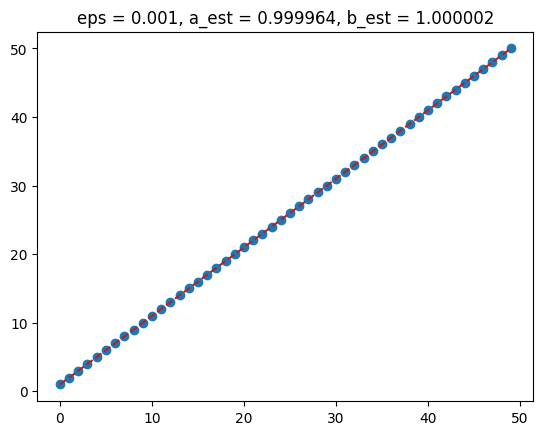

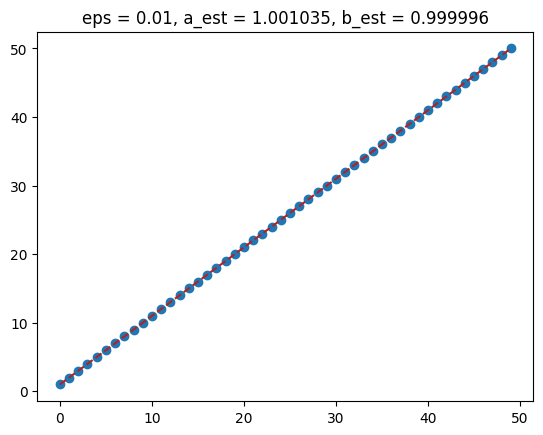

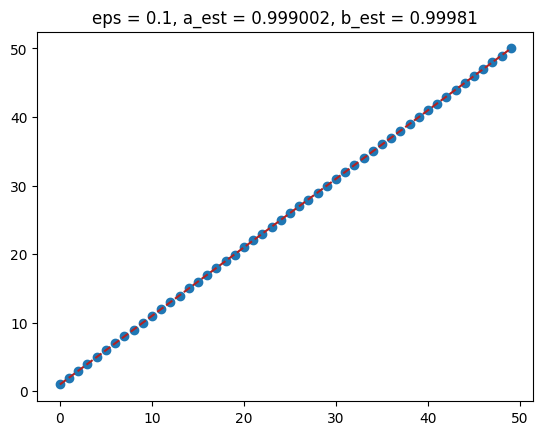

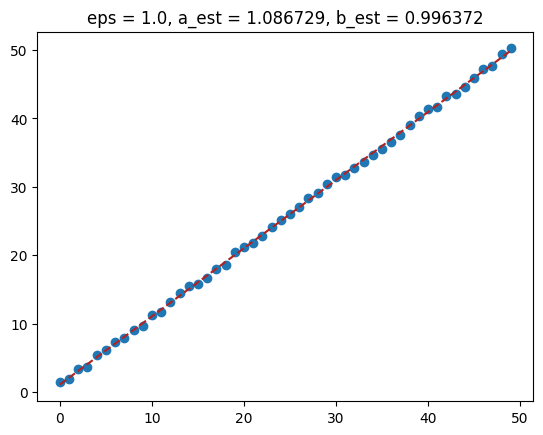

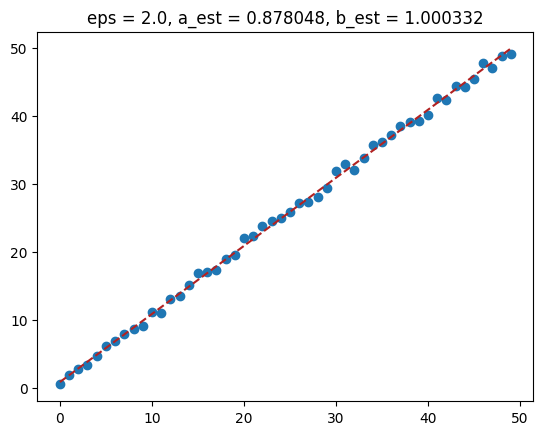

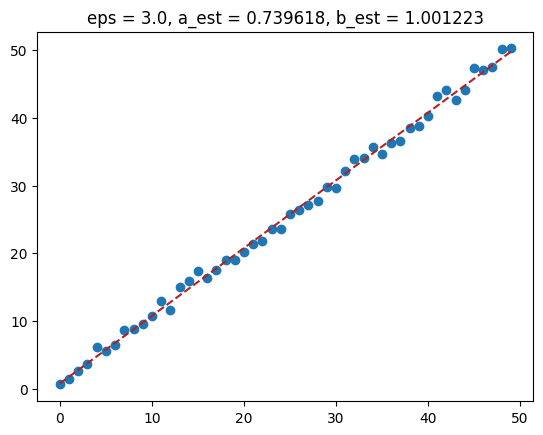

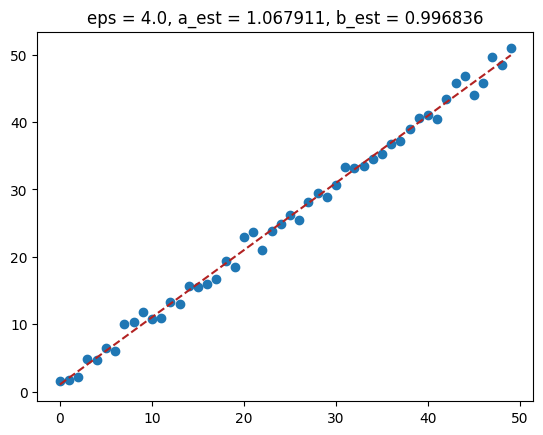

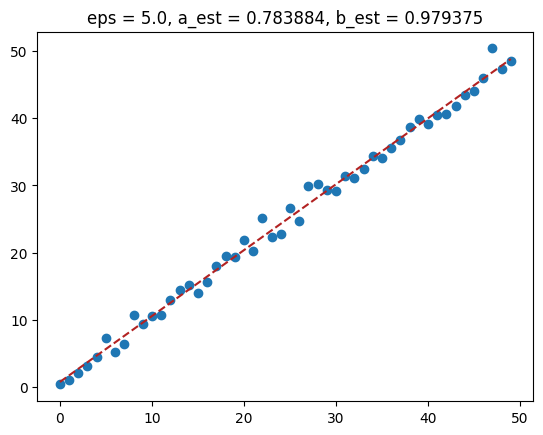

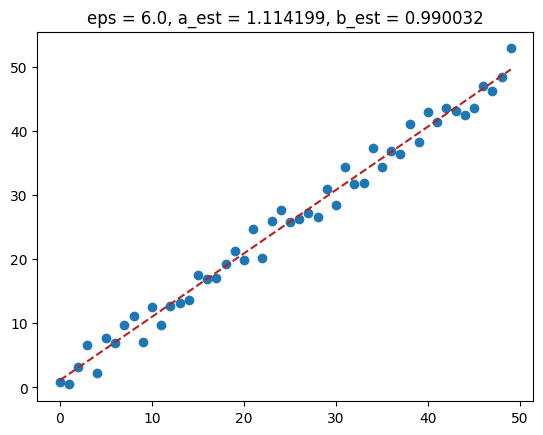

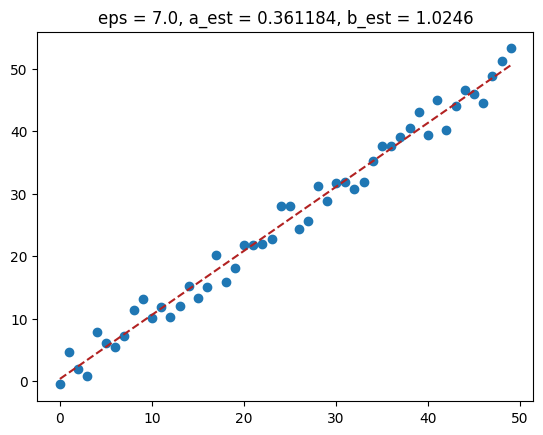

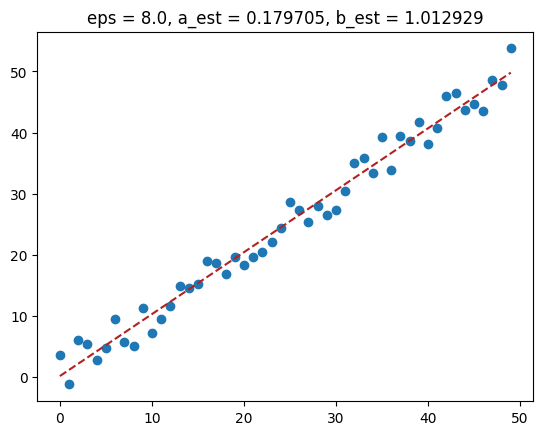

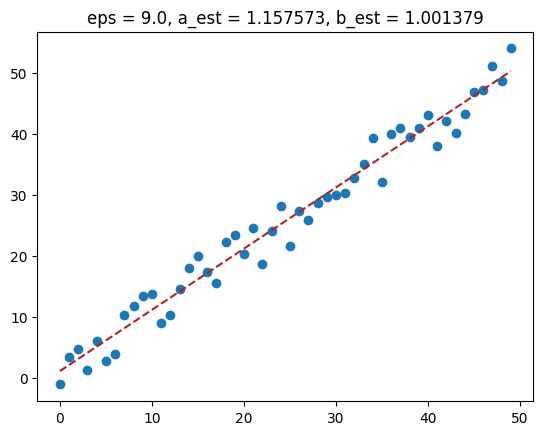

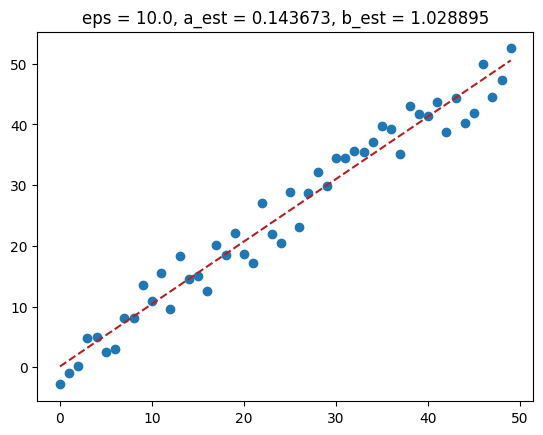

In [83]:
for i in range(len(eps_array)):
    plotting_llsf(50, eps_array[i])